In [8]:
import os
import numpy as np

In [96]:

def count_adjacent_true(arr):
    assert len(arr.shape) == 1
    assert arr.dtype == np.bool
    if arr.size == 0:
        return np.empty(0, dtype=int), np.empty(0, dtype=int)
    sw = np.insert(arr[1:] ^ arr[:-1], [0, arr.shape[0]-1], values=True)
    swi = np.arange(sw.shape[0])[sw]
    offset = 0 if arr[0] else 1
    lengths = swi[offset+1::2] - swi[offset:-1:2]
    if lengths.shape[0]==0:
        return (np.array([0]),np.array([0]))
    else:
        return swi[offset:-1:2], lengths
    

a=np.zeros(100)
a[:50]=1
def compute_metrics_label(label):
    label=(label==1)*1
    l=len(label)
    adj=count_adjacent_true(label==1)
#     print(adj)
    return np.array([min(adj[1])/l,max(adj[1])/l,np.mean(adj[1])/l,label.sum()/l,label[3::4].sum()/l])
res=compute_metrics_label(a)
print(res)

[0.5  0.5  0.5  0.5  0.12]


In [6]:
path_tags= [
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Blues.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Country.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Electronic.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Folk.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Jazz.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Latin.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Metal.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_New-Age.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Pop.id', # 8
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Punk.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Rap.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Reggae.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_RnB.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Rock.id', # 13
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_World.id',
    '/home/ftamagnan/dataset/id_lists/tagtraum/tagtraum_Unknown.id'
]
filepath_dataset = '/home/ftamagnan/dataset/lpd_5/lpd_5_cleansed/'

In [97]:
def iterate_metrics(labeltype):

    metrics=np.zeros((1,6))
    for tag_i, tag in enumerate(path_tags):


        print('>>' + tag[32:-3])
        with open(tag, 'r') as f:
            # ITERATE OVER THE FOLDER LISTS
            for i, file in enumerate(f):
                file = file.rstrip()
                middle = '/'.join(file[2:5]) + '/'        
                p = filepath_dataset + middle + file
                for npz in os.listdir(p):
                    if labeltype in npz:
                        data=dict(np.load(p+'/'+npz))
                        label=data['label']
                        m=compute_metrics_label(label)
                        m_=np.concatenate([m,np.array([tag_i])])
                        m_=m_.reshape((1,6))
                        metrics=np.concatenate((metrics,m_))
    return metrics

In [98]:
metrics_sk=iterate_metrics('label.npz')
metrics_clustering=iterate_metrics('label_clustering.npz')

>>/tagtraum/tagtraum_Blues
>>/tagtraum/tagtraum_Country
>>/tagtraum/tagtraum_Electronic
>>/tagtraum/tagtraum_Folk
>>/tagtraum/tagtraum_Jazz
>>/tagtraum/tagtraum_Latin
>>/tagtraum/tagtraum_Metal
>>/tagtraum/tagtraum_New-Age
>>/tagtraum/tagtraum_Pop
>>/tagtraum/tagtraum_Punk
>>/tagtraum/tagtraum_Rap
>>/tagtraum/tagtraum_Reggae
>>/tagtraum/tagtraum_RnB
>>/tagtraum/tagtraum_Rock
>>/tagtraum/tagtraum_World
>>/tagtraum/tagtraum_Unknown
>>/tagtraum/tagtraum_Blues
>>/tagtraum/tagtraum_Country
>>/tagtraum/tagtraum_Electronic
>>/tagtraum/tagtraum_Folk
>>/tagtraum/tagtraum_Jazz
>>/tagtraum/tagtraum_Latin
>>/tagtraum/tagtraum_Metal
>>/tagtraum/tagtraum_New-Age
>>/tagtraum/tagtraum_Pop
>>/tagtraum/tagtraum_Punk
>>/tagtraum/tagtraum_Rap
>>/tagtraum/tagtraum_Reggae
>>/tagtraum/tagtraum_RnB
>>/tagtraum/tagtraum_Rock
>>/tagtraum/tagtraum_World
>>/tagtraum/tagtraum_Unknown


In [106]:
mean_sk=np.mean(metrics_sk,axis=0)
mean_sk=mean_sk[:-1]*100

mean_c=np.mean(metrics_clustering,axis=0)
mean_c=mean_c[:-1]*100
print(mean_c)
print(mean_sk)



[ 2.26225018  3.99429175  2.89174716 13.43161809  3.25146726]
[1.94276776 4.84895966 3.07945136 7.81742733 1.81605932]


[1, 1, 1, 1, 1] [2.262250183492365, 3.99429174542283, 2.8917471617287256, 13.431618087914297, 3.2514672618288207]


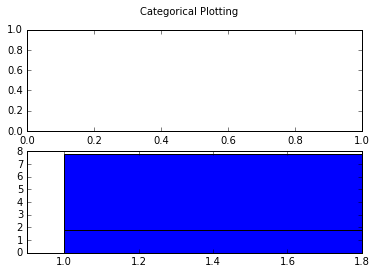

In [119]:

import matplotlib.pyplot as plt
names = ['min adj','max adj','mean_adj','count','on 4th beat']

values_c = mean_c.tolist()
values_s = mean_sk.tolist()

fig, axs = plt.subplots(2, 1)
print(names,values_c)
# axs[0].bar(names, values_c)
axs[1].bar(names,values_s)

fig.suptitle('Categorical Plotting')


ValueError: could not convert string to float: 'lemons'

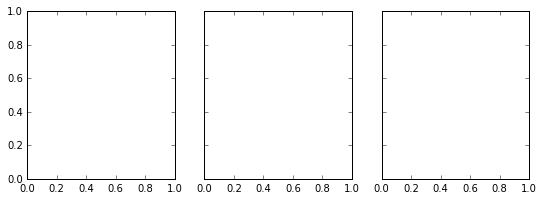

In [120]:
import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
